In [1]:
import glob

import csv
import statistics
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

plt.style.use(['science', 'ieee', 'no-latex'])  #pip install SciencePlots==1.0.9

In [2]:
def imprt():
    M = {}
    P = {}
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/missions.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            M[row[0]] = np.genfromtxt(row[1:10], dtype='int')
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/pilots.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            P[row[0]] = np.genfromtxt(row[1:6], dtype='int')
    return M, P

In [3]:
def read_history_live(hist):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 41
        else:
            check_min = total_sorties_p >= 58
        count = 0
        for m in M:     
            if hist[p][m] - M[m][P[p][0]] < 0:
                count += 1
                print(f'min LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 69
        else:
            check_desired = total_sorties_p >= 73
        count = 0
        for m in M:
            if hist[p][m] - M[m][P[p][1]] < 0:
                count += 1
                print(f'desired LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [4]:
def read_history_sim(hist_sim):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist_sim[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 37
        else:
            check_min = total_sorties_p >= 42
        count = 0
        for m in M:     
            if hist_sim[p][m] - M[m][P[p][2]] < 0:
                count += 1
                print(f'min SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist_sim[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 53
        else:
            check_desired = total_sorties_p >= 72
        count = 0
        for m in M:
            if hist_sim[p][m] - M[m][P[p][P[p][3]]] < 0:
                count += 1
                print(f'desired SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [5]:
M, P = imprt()

In [6]:
data = np.full((len(glob.glob('*CTresults_live.txt')),6), 0)
i = 0
print('live missions:')
for file in glob.glob('*CTresults_live.txt'):
    with open(file) as f:
        hist = json.load(f)
        min_CT, des_CT, sorties, no_sorties_live = read_history_live(hist)
        data[i][0] = min_CT
        data[i][1] = des_CT
        data[i][2] = sorties
        i += 1
i = 0
print('sim missions:')
for simfile in glob.glob('*CTresults_sim.txt'):
    with open(simfile) as g:
        hist_sim = json.load(g)
        min_CT, des_CT, sorties, no_sorties_sim = read_history_sim(hist_sim)
        data[i][3] = min_CT
        data[i][4] = des_CT
        data[i][5] = sorties
        i += 1

live missions:
min LIVE failed for pilot Sundown on mission OCA_d_4
desired LIVE failed for pilot Viper on mission ISR_n_2
desired LIVE failed for pilot Sundown on mission OCA_d_4
desired LIVE failed for pilot Slider on mission DCA_d_4
desired LIVE failed for pilot Chipper on mission SDEAD_d_4
desired LIVE failed for pilot Kenny on mission ISR_d_2
desired LIVE failed for pilot Danger on mission OCA_d_4
desired LIVE failed for pilot Goose on mission CAS_d_4
desired LIVE failed for pilot Merlin on mission ISR_n_2
desired LIVE failed for pilot Charlie on mission CAS_d_4
min LIVE failed for pilot Kenny on mission OCA_d_4
desired LIVE failed for pilot Iceman on mission OCA_d_4
desired LIVE failed for pilot Sundown on mission DCA_d_4
desired LIVE failed for pilot Slider on mission AI_d_4
desired LIVE failed for pilot Cougar on mission OCA_d_4
desired LIVE failed for pilot Kenny on mission OCA_d_4
min LIVE failed for pilot Wolfman on mission DCA_n_4
desired LIVE failed for pilot Wolfman on mi

In [7]:
pilotFL = list()
for p in P:
    pilotFL.append(P[p][4])
print(no_sorties_live)
print(sum(no_sorties_live))
print(no_sorties_sim)
print(sum(no_sorties_sim))
print(pilotFL)
#for i in range(len(no_sorties_live)):
 #   print(no_sorties_live[i]+(no_sorties_sim[i]))

[86, 77, 89, 87, 86, 87, 80, 82, 84, 86, 90, 84, 83, 82, 82, 85, 79, 86]
1515
[65, 67, 64, 73, 85, 86, 87, 82, 63, 65, 68, 65, 85, 88, 86, 84, 62, 62]
1337
[4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4]


In [8]:
comp = []
for i in range(len(data)):
    print(data[i])
    print(min(data[i]))
    comp.append(min(data[i]))

[  17   16 1489   18   18 1359]
16
[  18   15 1485   18   17 1341]
15
[  18   17 1537   18   18 1378]
17
[  18   15 1513   18   17 1371]
15
[  17   13 1407   17   14 1264]
13
[  17   17 1526   18   18 1366]
17
[  17   17 1532   18   17 1378]
17
[  16   15 1522   18   16 1384]
15
[  16   16 1519   18   18 1392]
16
[  18   17 1516   18   17 1371]
17
[  16   15 1526   18   17 1379]
15
[  18   18 1498   18   14 1327]
14
[  16   16 1515   18   15 1352]
15
[  17   17 1506   18   18 1398]
17
[  16   16 1542   18   17 1369]
16
[  17   17 1534   18   16 1370]
16
[  17   17 1526   18   15 1355]
15
[  17   17 1514   18   17 1377]
17
[  15   14 1510   18   17 1374]
14
[  17   15 1521   18   16 1353]
15
[  17   17 1529   18   16 1368]
16
[  17   16 1525   18   18 1380]
16
[  16   14 1518   18   16 1371]
14
[  18   18 1518   18   17 1370]
17
[  16   15 1524   18   15 1374]
15
[  15   10 1489   18   16 1364]
10
[  17   17 1536   18   14 1358]
14
[  17   17 1524   18   17 1353]
17
[  18   18 1544   18

In [9]:
print(sum(comp)/len(comp))

15.433333333333334


16
15
17
15
13
17
17
15
16
17
15
14
15
17
16
16
15
17
14
15
16
16
14
17
15
10
14
17
18
14


{'whiskers': [<matplotlib.lines.Line2D at 0x1ddef609a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ddf05ee130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ddef6096d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ddf05ee7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ddf05eeaf0>],
 'means': []}

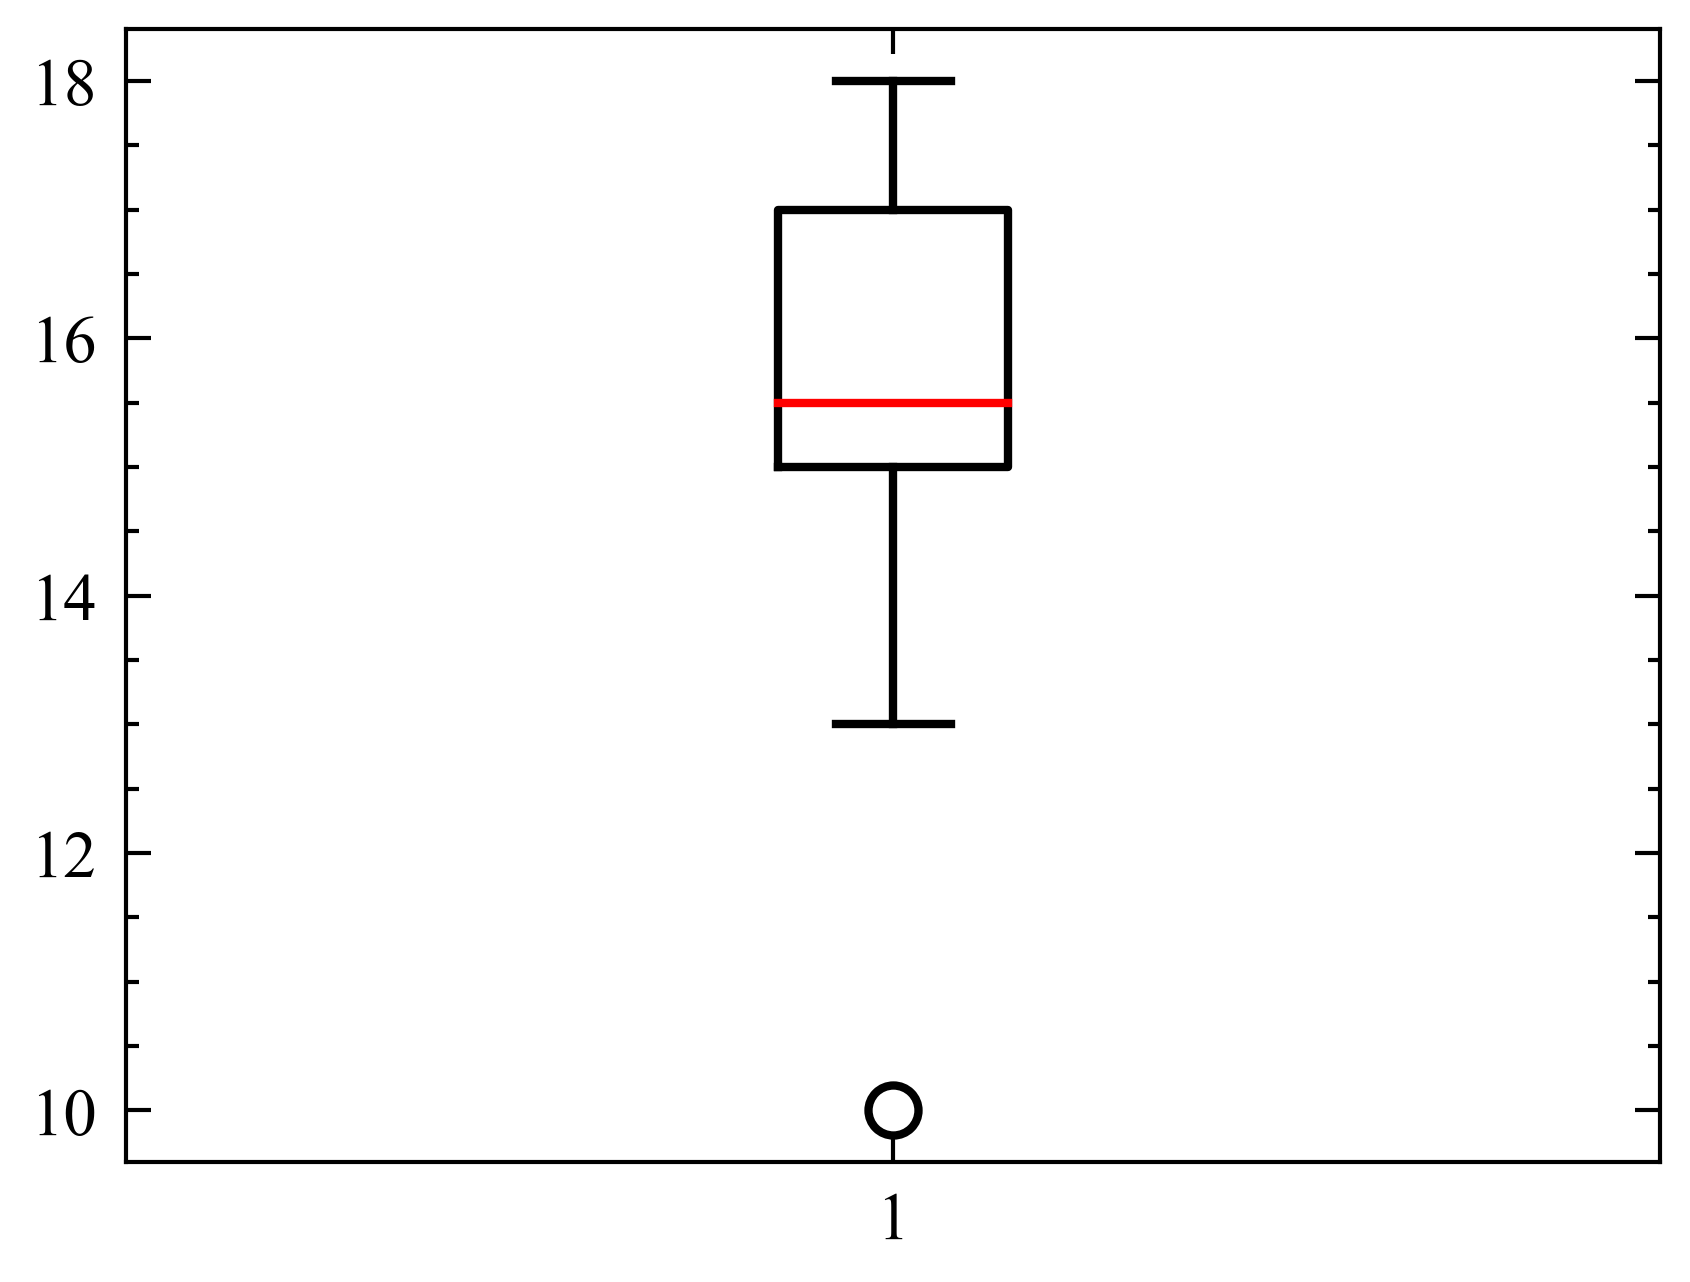

In [10]:
avgs = []
for i in range(len(data)):
    print(min(data[i]))
    avgs.append(min(data[i]))
plt.boxplot(avgs)

In [11]:
print(sum(avgs)/len(avgs))

15.433333333333334


In [12]:
run_data = []
relative = []
for file in glob.glob('*_data.txt'):
    with open(file) as f:
        a = json.load(f)
        run_data.append(a["FHR_cummulative"])
        relative.append(a['regen'])
print(run_data[0][1])


10.5


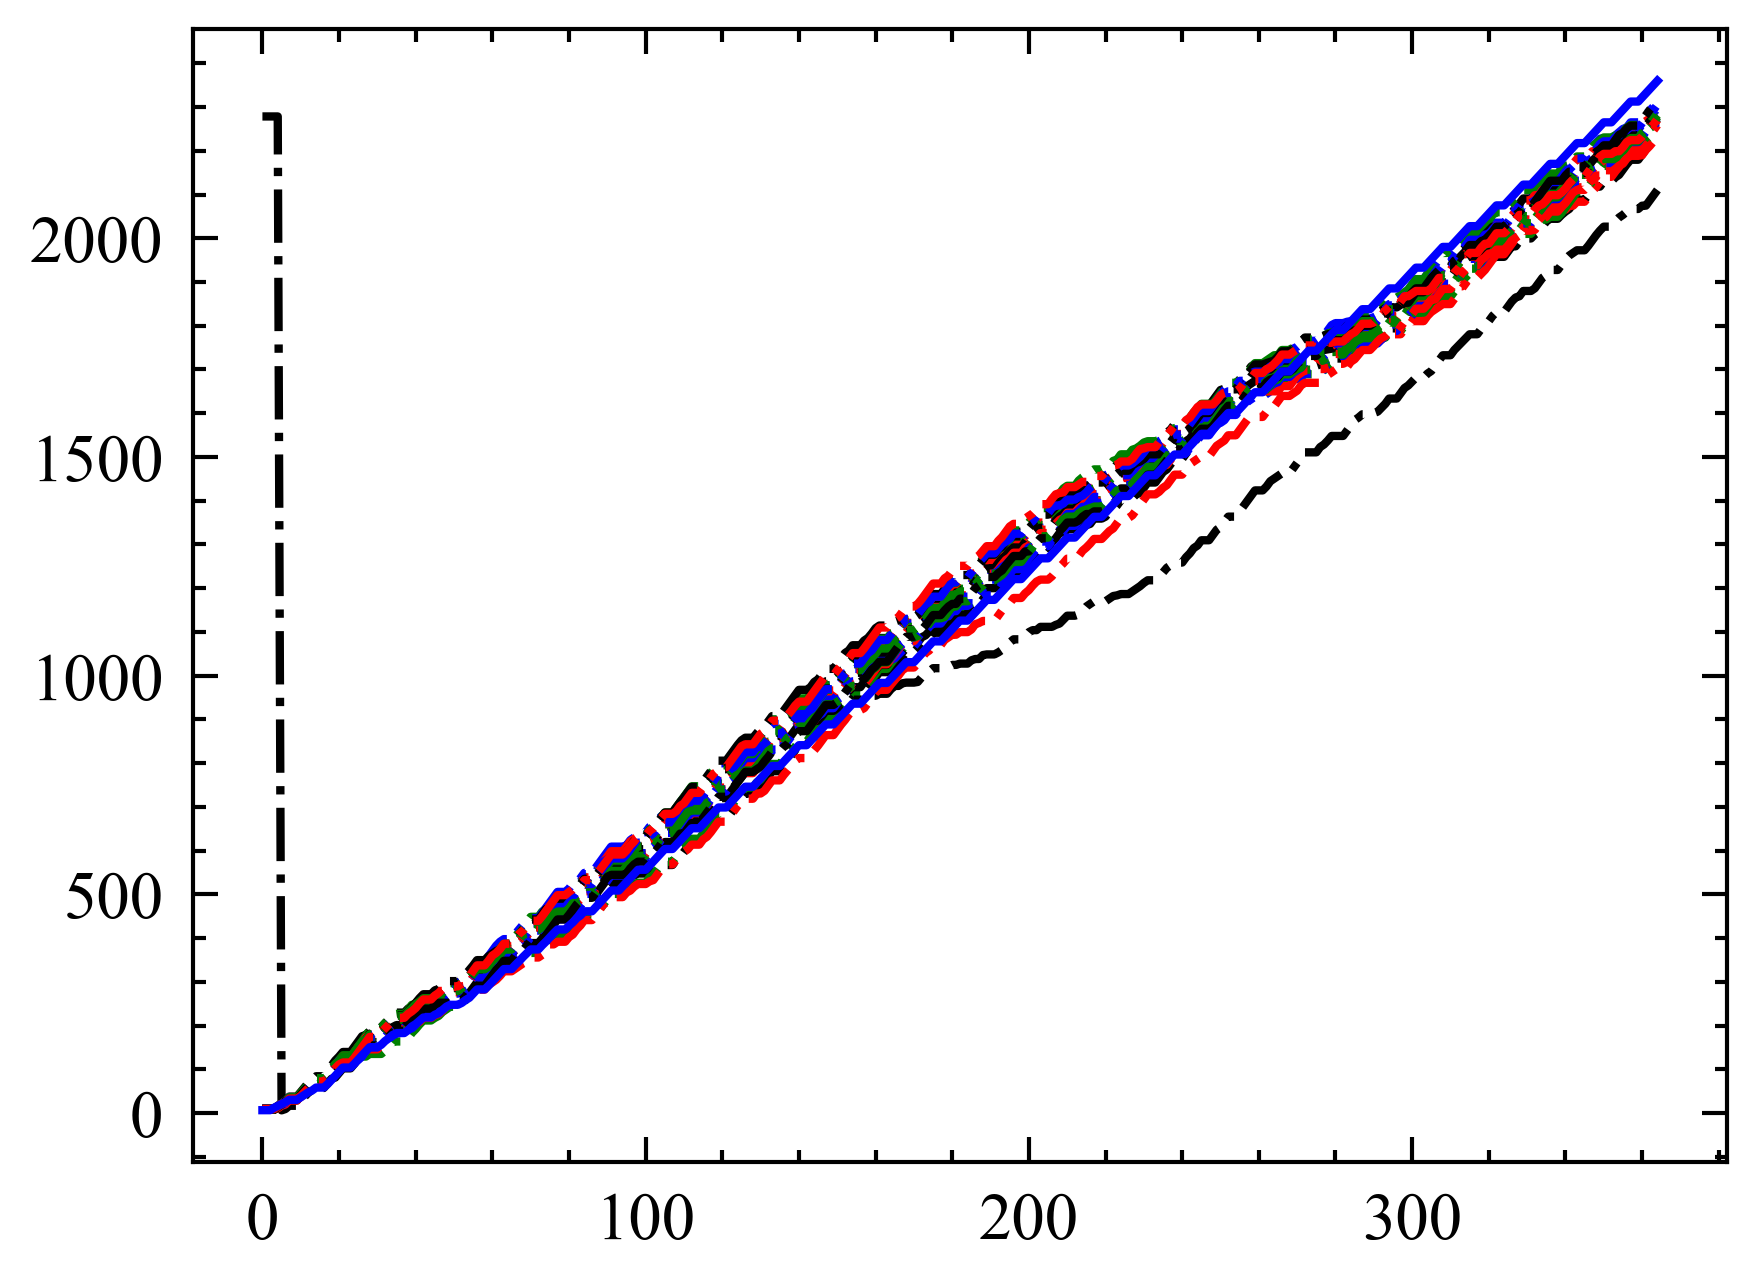

In [13]:
#for i in range(len(run_data)):
#    print(max(run_data[i]))
for i in range(len(run_data)):
    plt.plot(run_data[i], linestyle='dashdot')
plt.plot(a["FT_FMP"], linestyle='-')
plt.savefig('FHR.jpg', dpi=300)

<function matplotlib.pyplot.show(*args, **kw)>

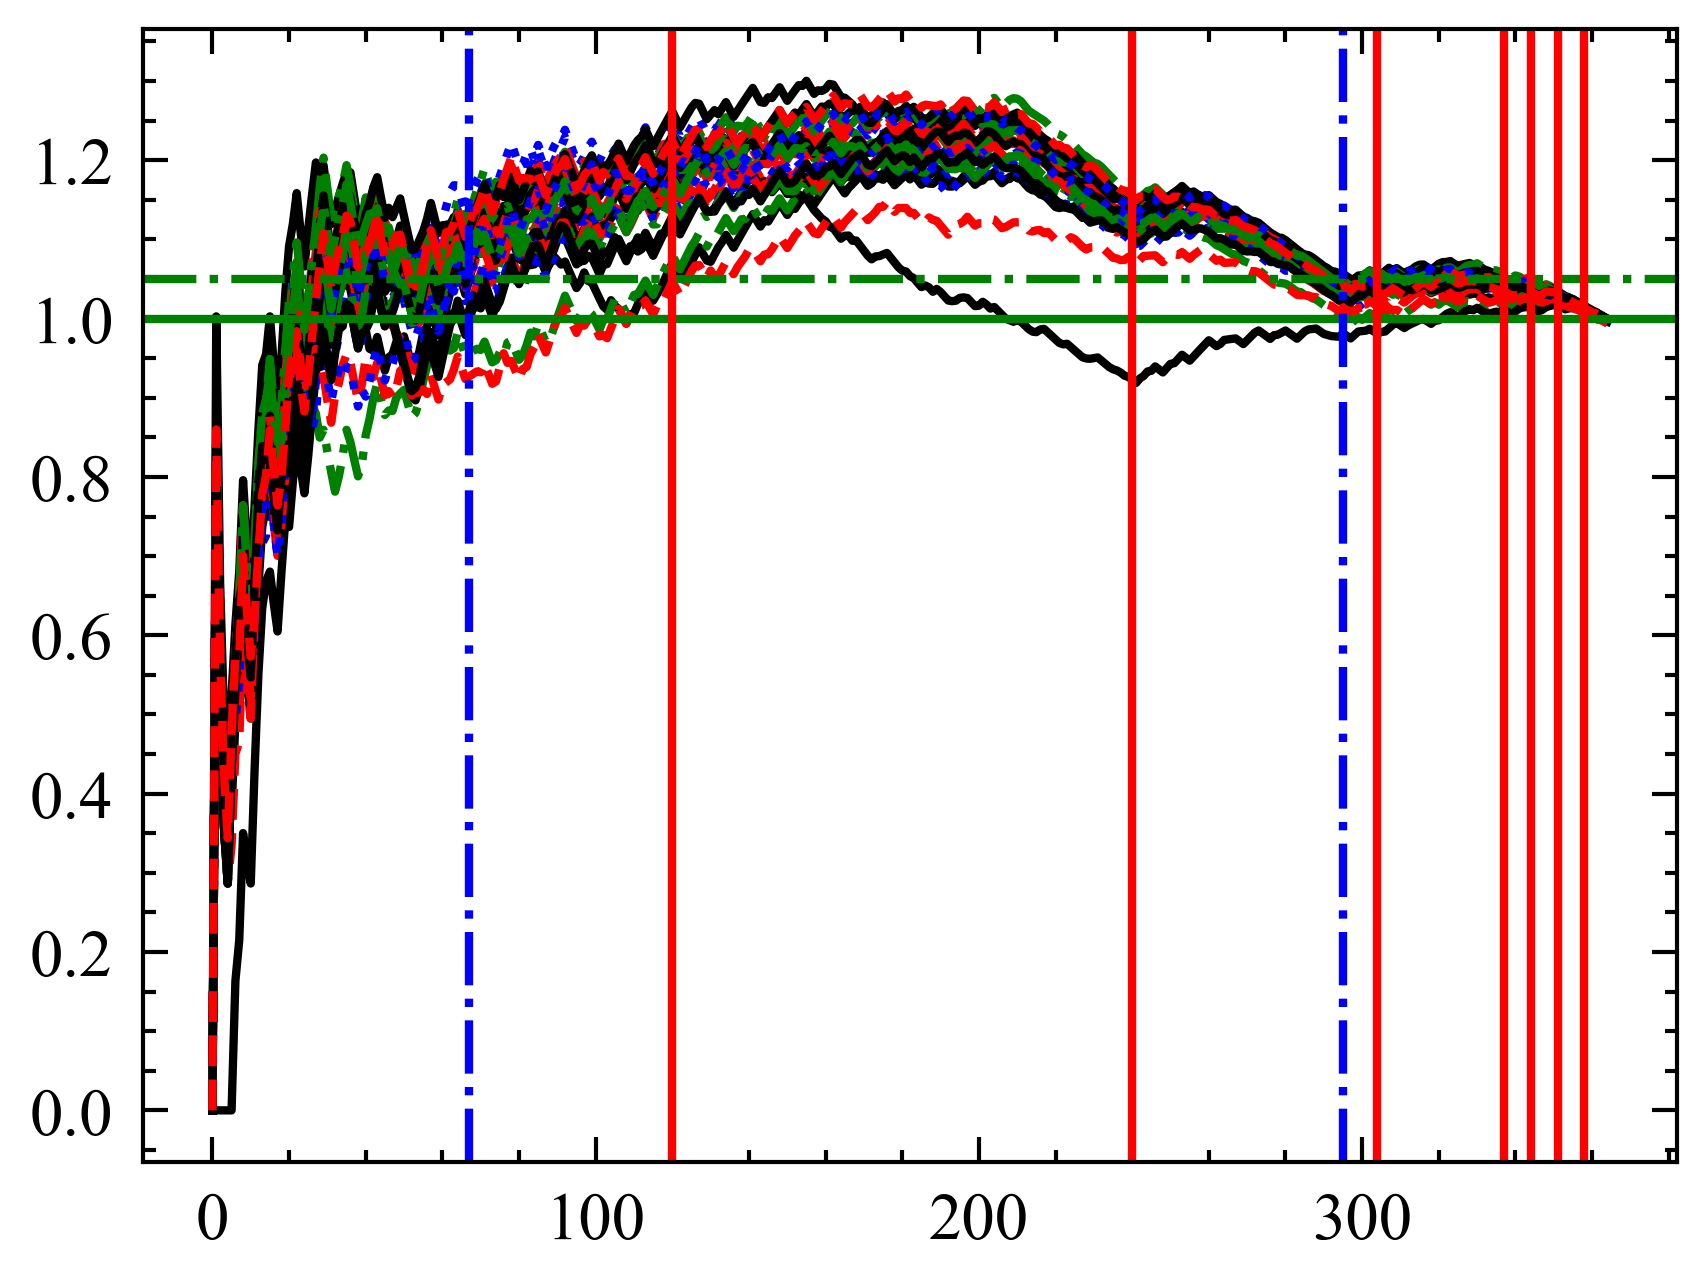

In [14]:
for i in range(len(relative)):
    plt.plot(relative[i])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=1.05, color='g', linestyle='dashdot')
plt.axvline(x=67, color='b', linestyle='dashdot')
plt.axvline(x=120, color='r', linestyle='-')
plt.axvline(x=240, color='r', linestyle='-')
plt.axvline(x=304, color='r', linestyle='-')
plt.axvline(x=337, color='r', linestyle='-')
plt.axvline(x=344, color='r', linestyle='-')
plt.axvline(x=351, color='r', linestyle='-')
plt.axvline(x=358, color='r', linestyle='-')
plt.axvline(x=295, color='b', linestyle='dashdot')
plt.show

In [15]:
bound = []

line_max = []
line_min = []
line_avg = []
#for i in range(30):
   # for j in range(len(run_data)):
        #print(run_data[j][i])

In [16]:
bound = []

line = []
for j in range(len(run_data)):
    line.append(max(run_data[j]))
print(line)
bound.append(line)
#plt.plot(bound[0])


[2233.5, 2227.5, 2305.5, 2269.5, 2110.5, 2289.0, 2298.0, 2283.0, 2278.5, 2274.0, 2289.0, 2247.0, 2272.5, 2259.0, 2313.0, 2301.0, 2289.0, 2271.0, 2265.0, 2281.5, 2293.5, 2287.5, 2277.0, 2277.0, 2286.0, 2233.5, 2304.0, 2286.0, 2316.0, 2272.5]


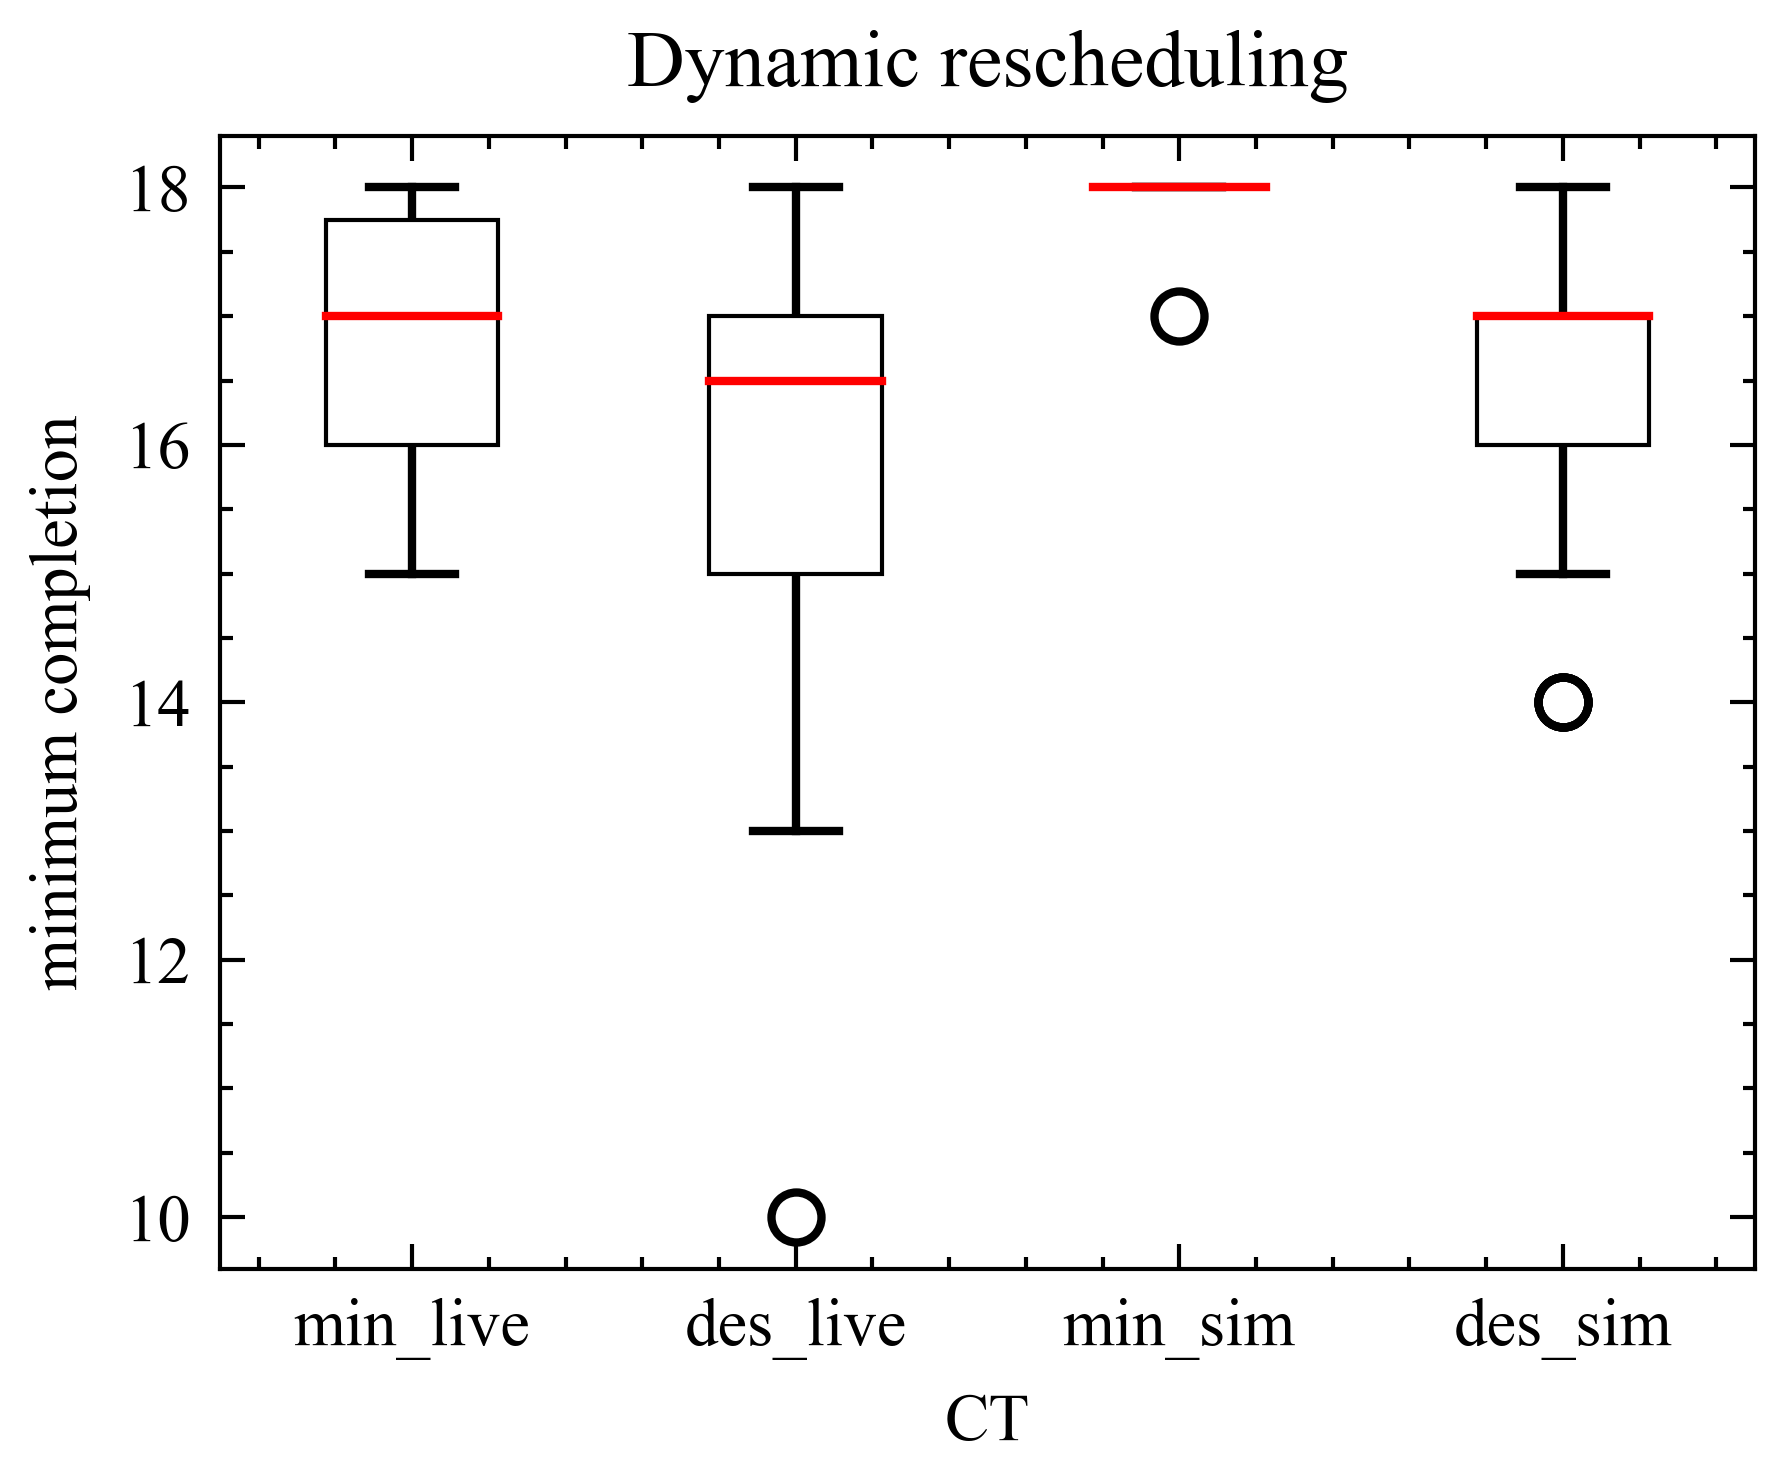

In [17]:
fig, ax = plt.subplots()
boxes = [data[0:30,0], data[0:30,1], data[0:30,3], data[0:30,4]]
bp = ax.boxplot(boxes, patch_artist=True)
ax.set(xlabel='CT'.format('Arial'))
ax.set(ylabel='minimum completion'.format('Arial'))
ax.set_title('Dynamic rescheduling'.format('Arial'))
ax.set_xticklabels(['min_live', 'des_live', 'min_sim', 'des_sim', f'{len(data)}'])
for box in bp['boxes']:
    box.set( color='k', linewidth=0.5)
    box.set( facecolor = 'w' )

for flier in bp['fliers']:
    flier.set(marker='o', color='r')#, alpha=0.5
fig.savefig('box.jpg', dpi=300)

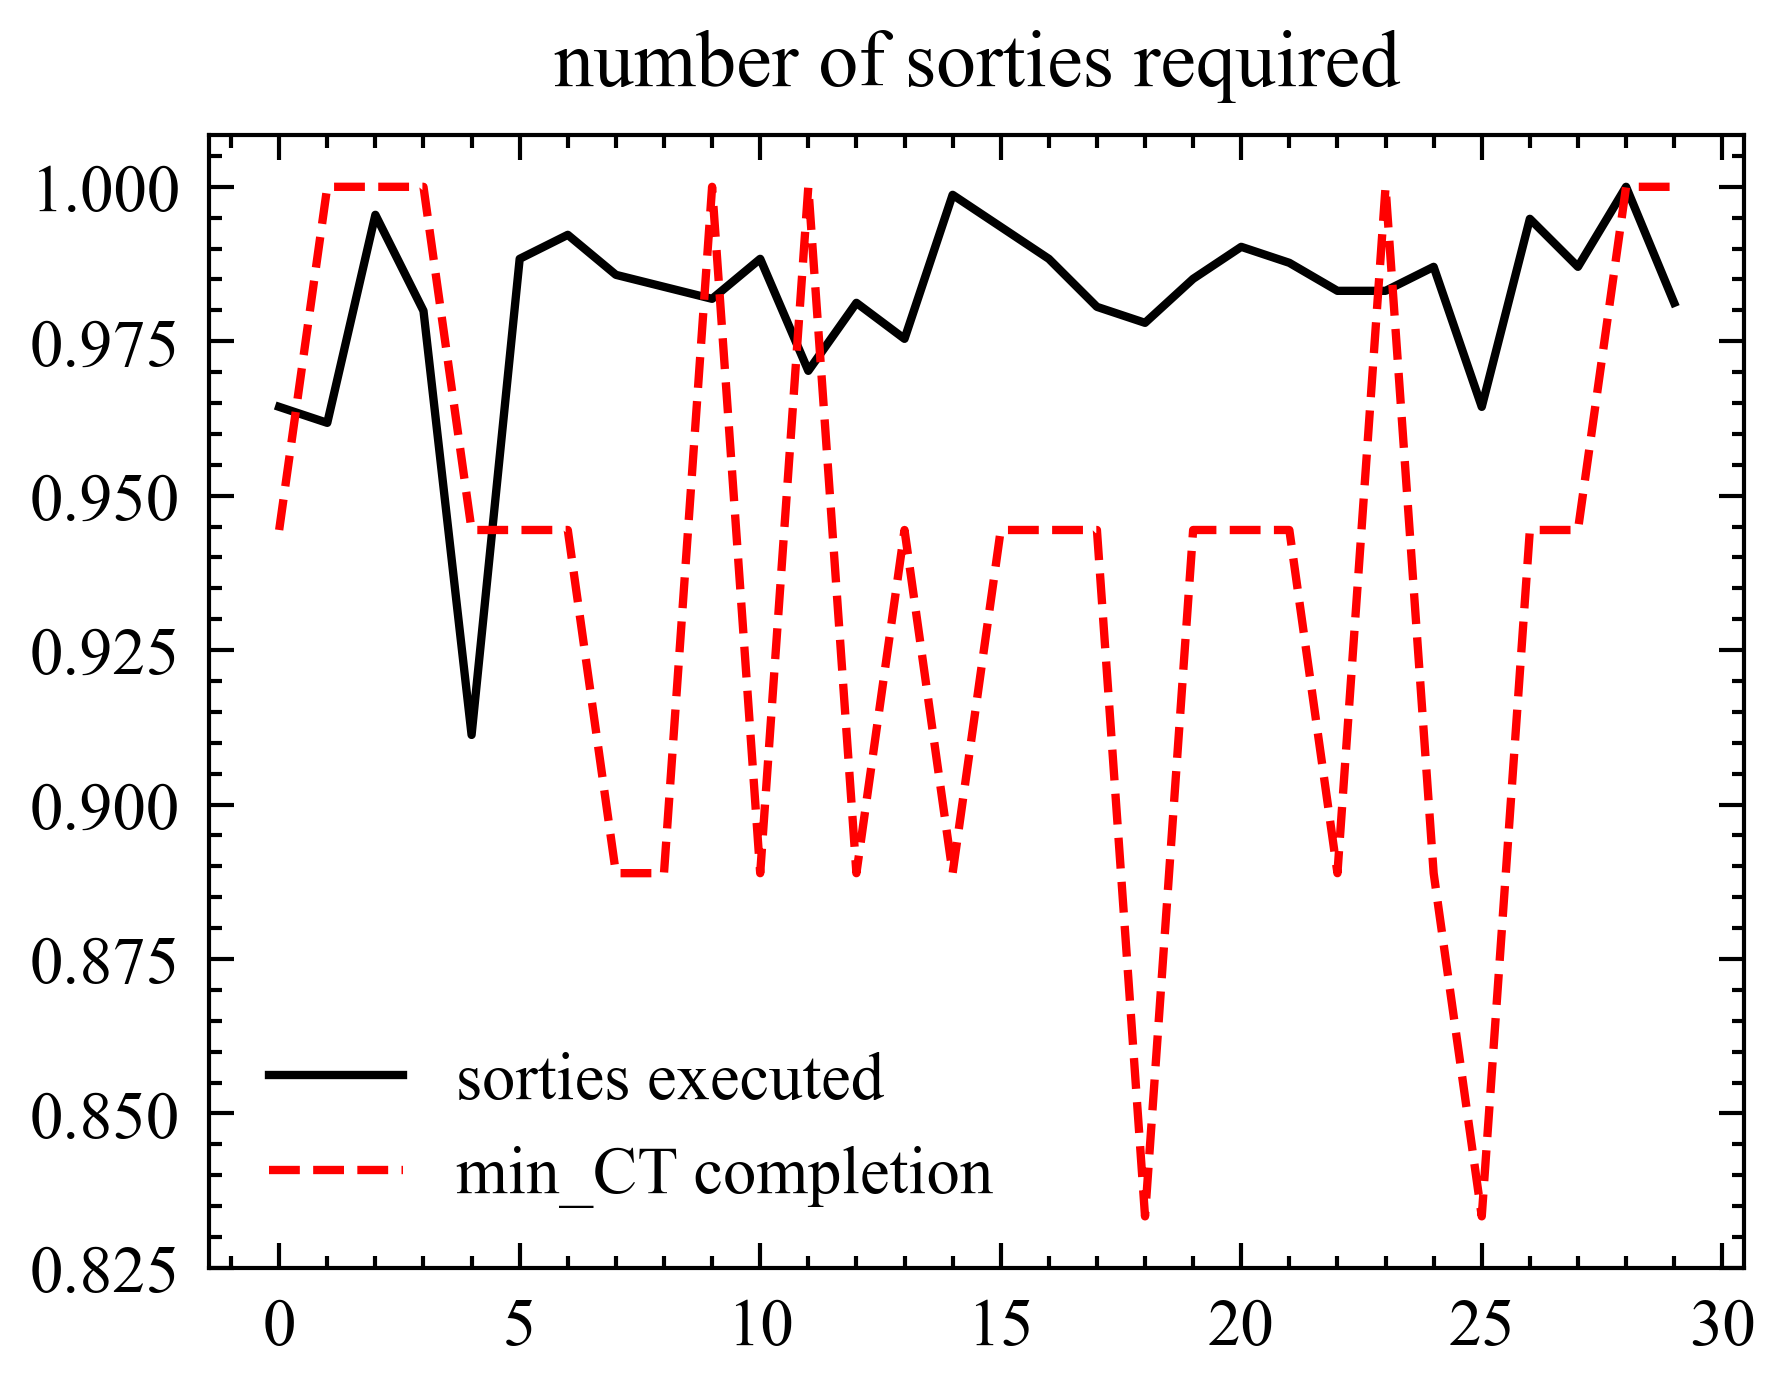

In [18]:
plt.plot(data[:,2]/max(data[:,2]), label='sorties executed')
plt.plot(data[:,0]/max(data[:,0]), c='r', label='min_CT completion')
plt.title('number of sorties required')
plt.legend()
plt.savefig('sorties_normalized.jpg', dpi=300)

In [19]:
covariance = np.cov(data[:,2]/max(data[:,2]), (data[:,0]/10))
r_pearson = pearsonr(data[:,2], data[:,0])
print(r_pearson[0]) #pearson r
print(r_pearson[1]) #significance for pearson r

0.01237895210904625
0.9482348077785366


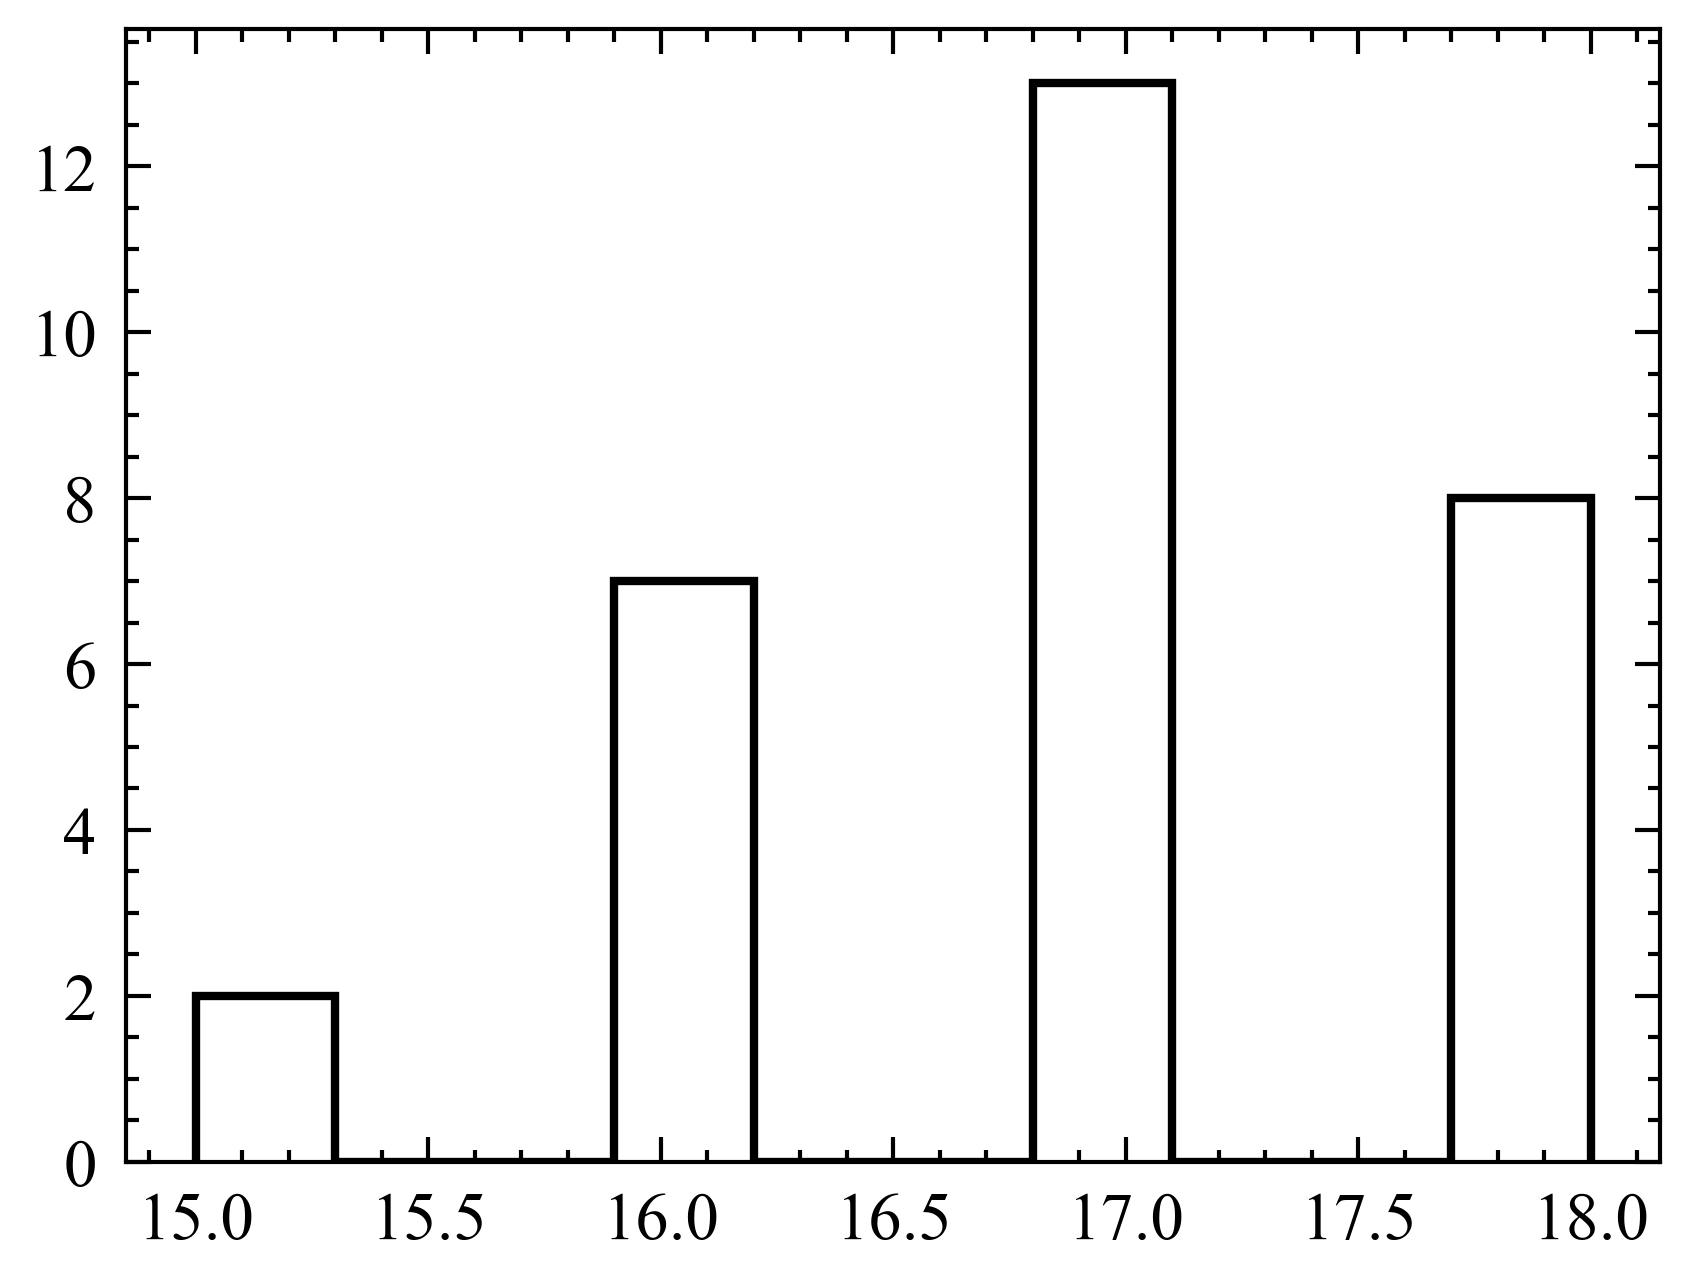

In [20]:
plt.hist(data[:,0], histtype='step')
plt.show()

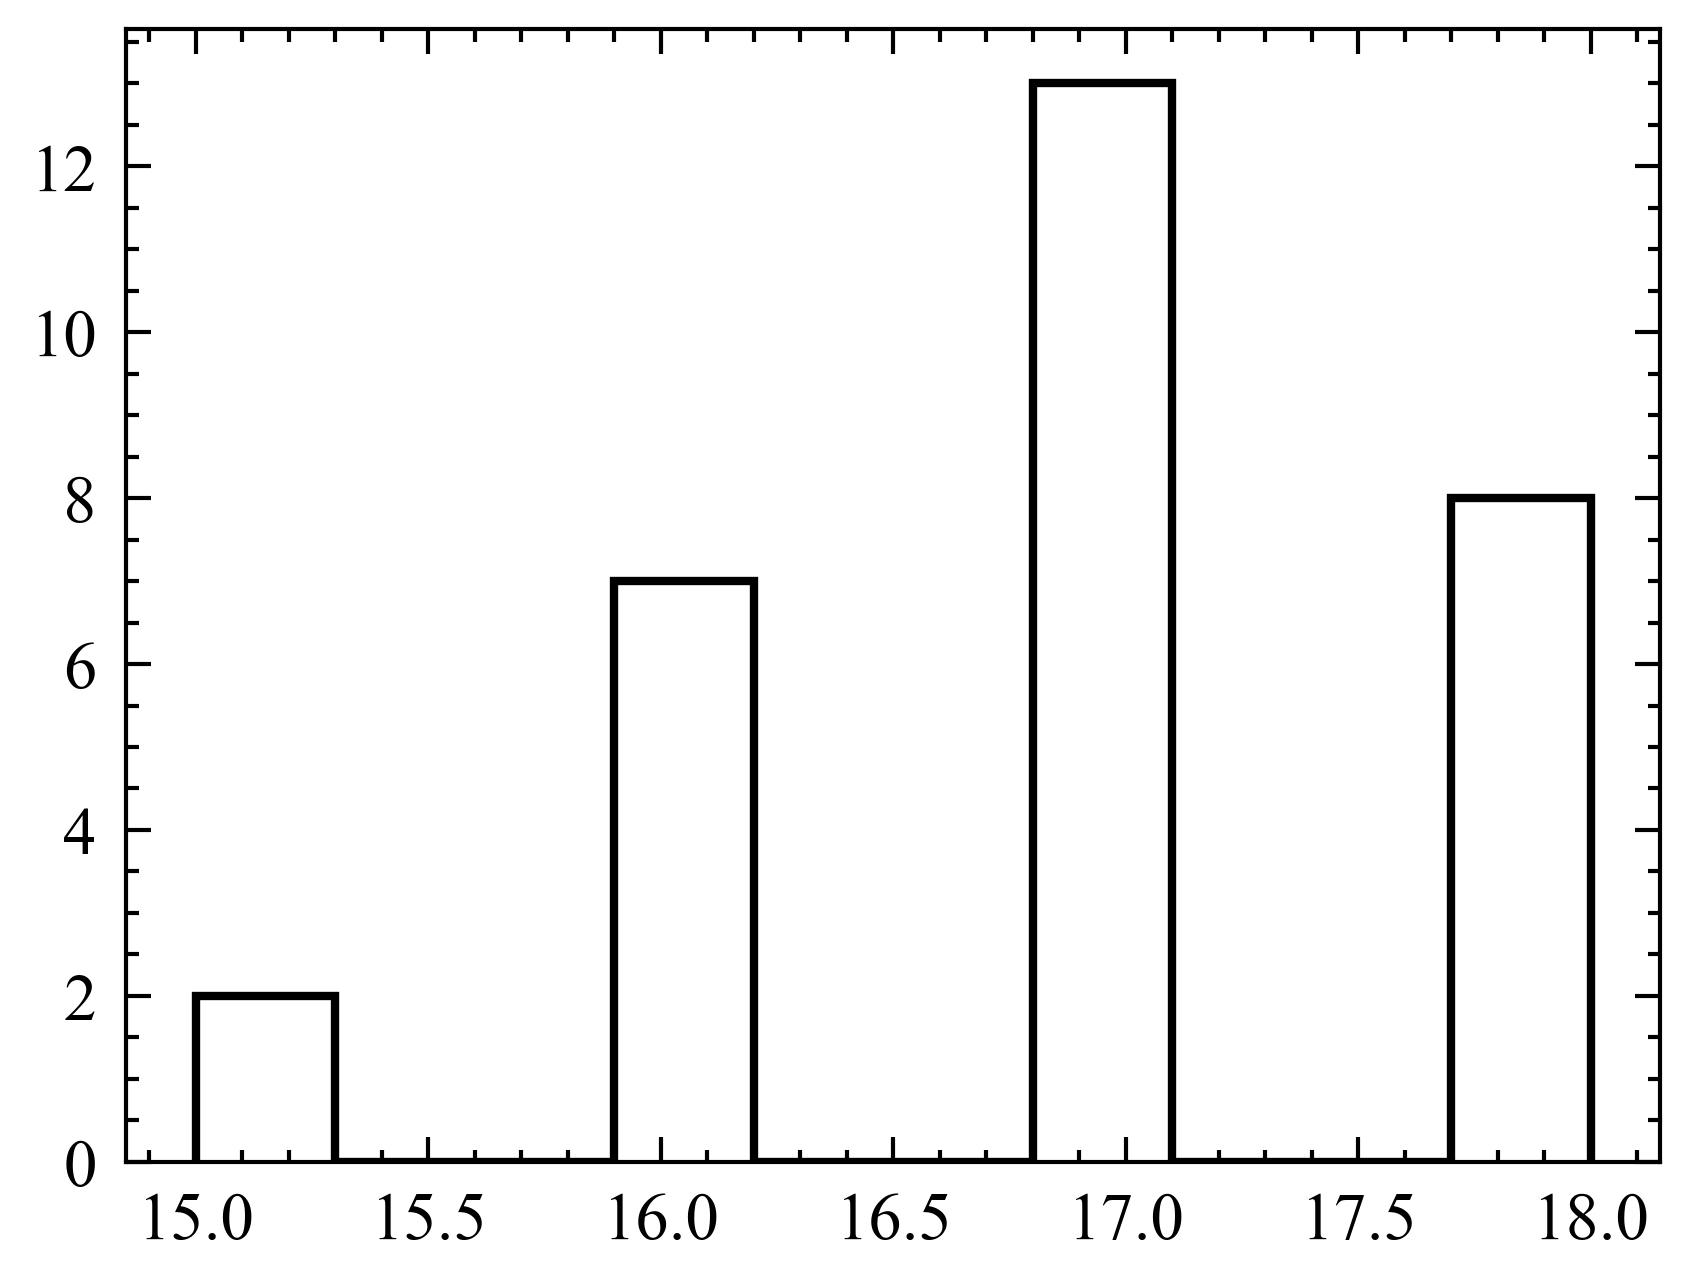

In [21]:
plt.hist(data[0:70,0], histtype='step')
plt.show()